In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_excel(r'C:\datasets\soil_data.xlsx')

# EXPLORATIVE DATA ANALYSIS 

In [3]:
df.head()

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.06,1.768,0.40
1,2,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.58,1.684,0.41
2,3,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.00,1.840,0.46
3,4,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.04,0.844,0.50
4,5,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.16,1.216,0.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         781 non-null    int64  
 1   Sand %     781 non-null    float64
 2   Clay %     781 non-null    float64
 3   Silt %     781 non-null    float64
 4   pH         781 non-null    float64
 5   EC mS/cm   781 non-null    float64
 6   O.M. %     781 non-null    float64
 7   CACO3 %    781 non-null    float64
 8   N_NO3 ppm  781 non-null    float64
 9   P ppm      781 non-null    float64
 10  K ppm      781 non-null    int64  
 11  Mg ppm     781 non-null    int64  
 12  Fe ppm     781 non-null    float64
 13  Zn ppm     781 non-null    float64
 14  Mn ppm     780 non-null    float64
 15  Cu ppm     781 non-null    float64
 16  B ppm      781 non-null    float64
dtypes: float64(14), int64(3)
memory usage: 103.9 KB


# DATA PREPARATION

1. There are one null value in the Mn column.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,781.0,391.000000,225.599572,1.000,196.00000,391.000,586.0000,781.000
Sand %,781.0,31.529321,10.978371,10.000,24.00000,30.000,38.0000,70.000
Clay %,781.0,34.997183,11.252452,6.000,28.00000,36.000,44.0000,64.000
Silt %,781.0,33.473496,8.384172,14.000,28.00000,32.000,38.0000,68.000
pH,781.0,7.133668,0.897823,4.490,6.66000,7.550,7.7800,8.200
EC mS/cm,781.0,0.452793,0.304841,0.134,0.33800,0.404,0.4970,5.621
O.M. %,781.0,2.028909,0.627244,0.370,1.59000,1.960,2.3700,4.980
CACO3 %,781.0,13.422049,13.381635,0.000,1.80000,8.710,22.0000,77.600
N_NO3 ppm,781.0,11.623384,11.052054,0.180,5.28000,8.850,14.3100,120.640
P ppm,781.0,13.840659,14.586017,1.070,5.73000,9.490,15.9800,152.420


In [6]:
df.isna().sum()

ID           0
Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       1
Cu ppm       0
B ppm        0
dtype: int64

In [7]:
dfNew = df.fillna(df.mean())

In [8]:
dfNew.isna().sum()

ID           0
Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       0
Cu ppm       0
B ppm        0
dtype: int64

In [9]:
dfNew.isna().sum()

ID           0
Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       0
Cu ppm       0
B ppm        0
dtype: int64

In [10]:
dfNew.columns

Index(['ID', 'Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %',
       'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm',
       'Mn ppm', 'Cu ppm', 'B ppm'],
      dtype='object')

In [11]:
dfNew = dfNew.drop(['ID'], axis = 1)

In [12]:
dfNew

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.580,1.684,0.41
2,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.000,1.840,0.46
3,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
4,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,26.0,46.0,28.0,6.720,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
777,40.0,28.0,32.0,7.790,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
778,34.0,28.0,38.0,7.630,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
779,16.0,38.0,46.0,7.730,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


In [13]:
col = ['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %',
       'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm',
       'Mn ppm', 'Cu ppm', 'B ppm','pH']

In [14]:
dfc = dfNew[col]

In [15]:
dfc

,Sand %,Clay %,Silt %,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,pH
0,42.0,38.0,20.0,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40,5.162
1,54.0,26.0,20.0,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.580,1.684,0.41,6.071
2,28.0,36.0,36.0,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.000,1.840,0.46,6.921
3,58.0,20.0,22.0,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50,7.704
4,33.2,41.2,25.6,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40,7.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,26.0,46.0,28.0,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33,6.720
777,40.0,28.0,32.0,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12,7.790
778,34.0,28.0,38.0,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26,7.630
779,16.0,38.0,46.0,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27,7.730


In [16]:
dfc.isna().sum()

Sand %       0
Clay %       0
Silt %       0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       0
Cu ppm       0
B ppm        0
pH           0
dtype: int64

# CHECKING FOR OUTLIERS

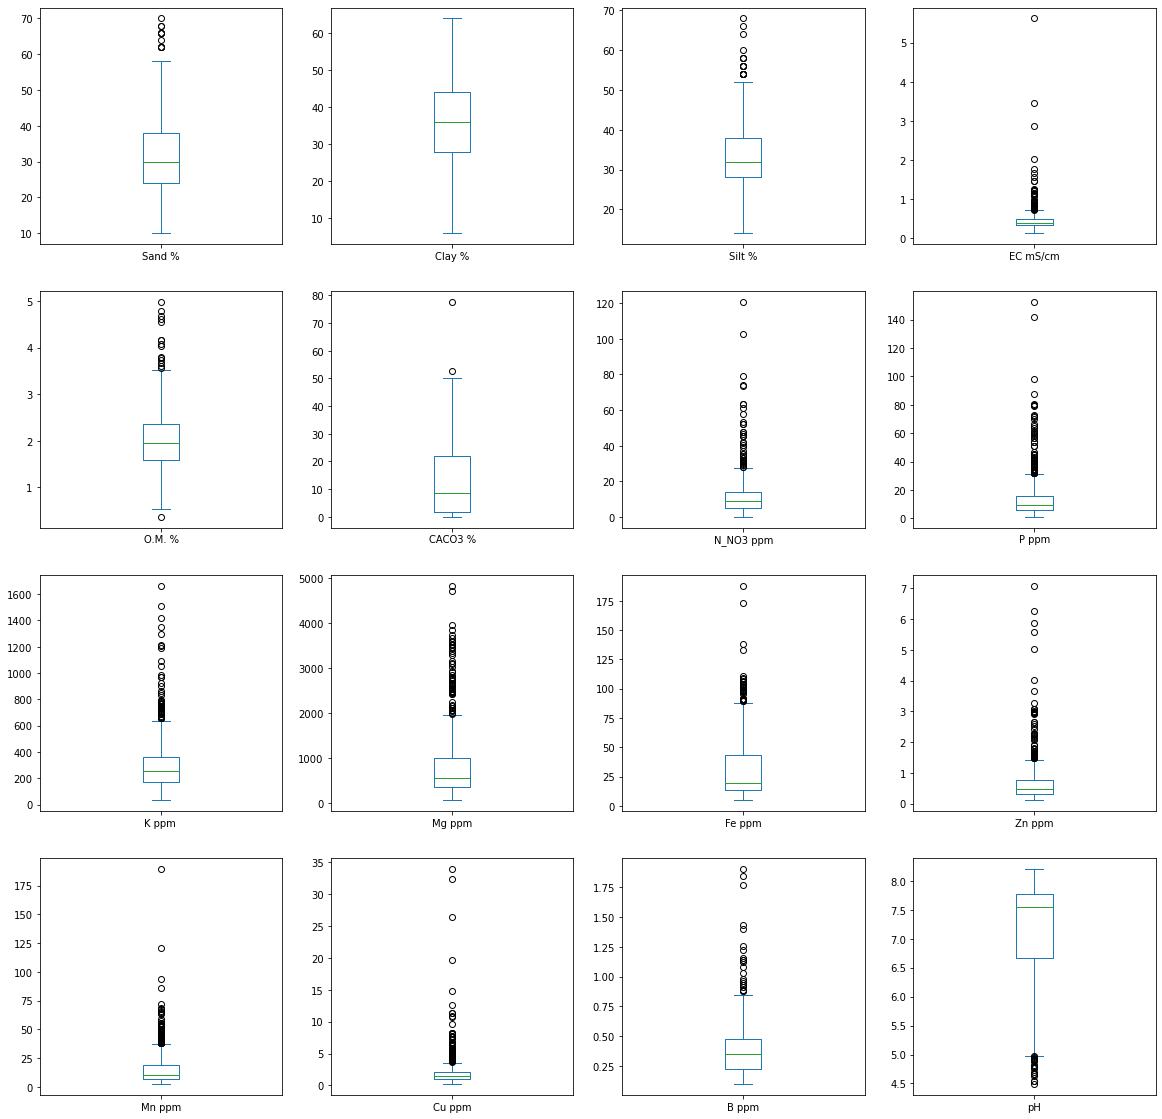

In [17]:
#BOX AND WHISKER PLOTS

dfc.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)
plt.gcf().set_size_inches(20,20)
plt.show()

<AxesSubplot:ylabel='Density'>

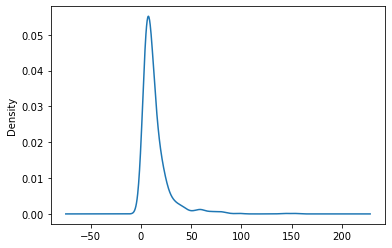

In [18]:
dfc['P ppm'].plot(kind ='density')

In [19]:
num_col =['Sand %','Silt %', 'EC mS/cm', 'O.M. %','CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm',
         'Mn ppm', 'Cu ppm', 'B ppm','pH']

In [20]:
def treat_outliers_column(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3 -q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    return upper_limit, lower_limit


In [21]:
for col in num_col:
    print('----------------------------------')
    print("column:", col)
    
    ul,ll = treat_outliers_column(dfc[col])
    print("Upper Limit =", ul)
    print("Lower Limit =", ll)
    
    total_outliers = len(dfc.loc[dfc[col] <ll, col]) + len(dfc.loc[dfc[col] >ul, col])
    percent = (total_outliers / len(dfc.index))*100
    
    print("Percentage of Outliers =", percent)
    print('----------------------------------')

----------------------------------
column: Sand %
Upper Limit = 59.0
Lower Limit = 3.0
Percentage of Outliers = 1.5364916773367476
----------------------------------
----------------------------------
column: Silt %
Upper Limit = 53.0
Lower Limit = 13.0
Percentage of Outliers = 2.176696542893726
----------------------------------
----------------------------------
column: EC mS/cm
Upper Limit = 0.7354999999999999
Lower Limit = 0.09950000000000006
Percentage of Outliers = 6.530089628681178
----------------------------------
----------------------------------
column: O.M. %
Upper Limit = 3.54
Lower Limit = 0.42000000000000015
Percentage of Outliers = 2.0486555697823303
----------------------------------
----------------------------------
column: CACO3 %
Upper Limit = 52.3
Lower Limit = -28.499999999999996
Percentage of Outliers = 0.2560819462227913
----------------------------------
----------------------------------
column: N_NO3 ppm
Upper Limit = 27.855000000000004
Lower Limit = -8.265

In [22]:
dfc.select_dtypes(include = 'float64').skew()

Sand %       0.599985
Clay %      -0.103175
Silt %       0.664757
EC mS/cm     8.870008
O.M. %       0.865790
CACO3 %      0.953486
N_NO3 ppm    3.838832
P ppm        3.910385
Fe ppm       1.707067
Zn ppm       4.329918
Mn ppm       3.617567
Cu ppm       7.809563
B ppm        2.034692
pH          -1.173369
dtype: float64

In [23]:
#Using log transformation  to reduce skewness
dfc[['EC mS/cm','N_NO3 ppm','P ppm','Zn ppm','Mn ppm','Cu ppm','B ppm']] = np.log1p(dfc[['EC mS/cm','N_NO3 ppm','P ppm','Zn ppm','Mn ppm','Cu ppm','B ppm']])

In [24]:
dfc.select_dtypes(include = 'float64').skew()

Sand %       0.599985
Clay %      -0.103175
Silt %       0.664757
EC mS/cm     3.585128
O.M. %       0.865790
CACO3 %      0.953486
N_NO3 ppm    0.024601
P ppm        0.583464
Fe ppm       1.707067
Zn ppm       1.969712
Mn ppm       0.593922
Cu ppm       2.019903
B ppm        1.116585
pH          -1.173369
dtype: float64

<AxesSubplot:ylabel='Density'>

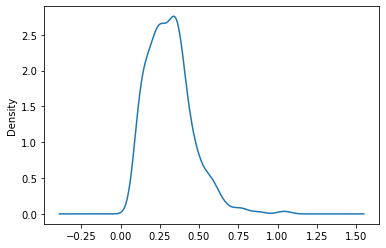

In [25]:
dfc['B ppm'].plot(kind ='density')

<AxesSubplot:ylabel='Density'>

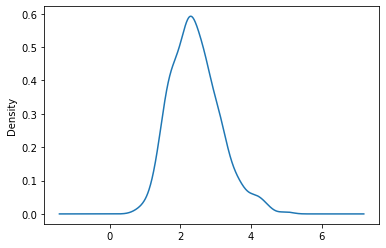

In [26]:
dfc['P ppm'].plot(kind ='density')

In [27]:
dfc.columns

Index(['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %',
       'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm', 'pH'],
      dtype='object')

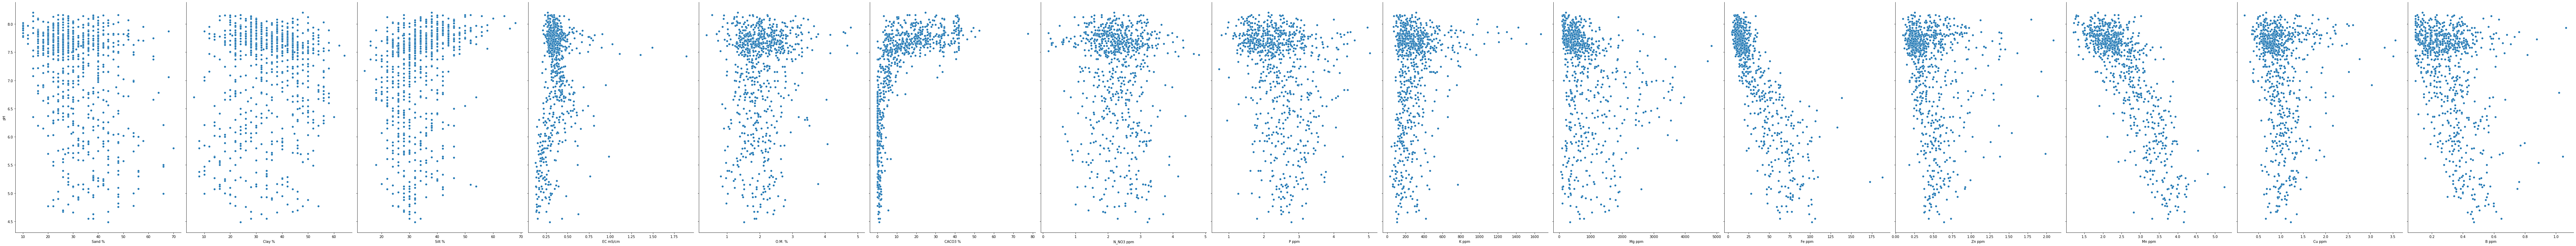

In [28]:
# Visualise the relationship between the features and the response using scatterplots
sb.pairplot(dfc, x_vars=['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %',
       'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm'], y_vars='pH',height=10, aspect=0.7, kind='scatter')

# CHECKING FOR MULTICOLINEARITY

If there are any two feature having correlation greater than 0.75, that indicates a presence of multicolinearity.
So therefore, there is a need to drop that particular column.

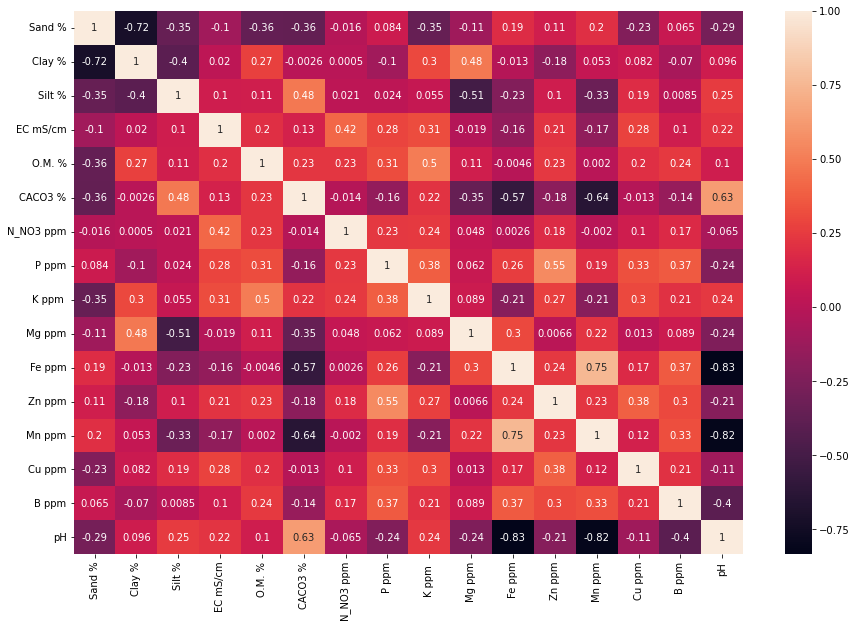

In [29]:
plt.figure(figsize=(15,10))
sb.heatmap(dfc.corr(),annot=True)
plt.show()

# STANDARDIZATION OF DATA

In [30]:
dfArr = dfc.values
X = dfArr[:, :-1]
Y = dfArr[:,-1]

In [31]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [32]:
X = pd.DataFrame(pre_process.fit_transform(X))


In [33]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.954366,0.267030,-1.608046,-0.825214,2.798959,-1.003663,0.650003,0.799328,-0.767877,0.396324,2.312433,0.608866,1.125735,0.065316,0.156910
1,2.048125,-0.800088,-1.608046,-0.396418,-0.920839,-1.003663,0.661547,1.582255,-0.598069,0.315434,1.109223,3.793006,0.524358,-0.010073,0.205842
2,-0.321686,0.089177,0.301535,1.078433,-0.416867,-0.973752,0.690809,0.829587,-0.582632,0.531139,1.155382,3.305540,0.556965,0.128136,0.445413
3,2.412711,-1.333646,-1.369348,-0.396418,-2.090777,-0.495178,-0.903669,-0.630571,-0.927394,-0.666024,-0.448641,1.783348,-1.114796,-0.928363,0.631234
4,0.152277,0.551595,-0.939692,-0.209011,-1.646801,-0.675391,-0.459664,-0.576658,-0.351075,0.159048,-0.206306,-1.064598,-0.675950,-0.478805,0.156910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,-0.503979,0.978442,-0.653255,0.094130,0.081506,-1.003663,-0.178149,0.943501,0.508259,-0.432793,0.264130,-0.475168,1.095267,-0.215322,-0.195731
777,0.772073,-0.622235,-0.175860,-0.458300,-1.035203,1.239652,-0.655539,-1.132039,-0.052623,-0.899255,-0.708285,-0.886339,-0.832824,-1.270999,-1.377198
778,0.225194,-0.622235,0.540233,2.766444,-0.253507,0.813422,0.877378,-0.512050,1.470508,-0.885773,-0.787524,-0.362804,-1.032625,-0.563035,-0.567442
779,-1.415444,0.267030,1.495023,-0.204015,-0.492802,2.458520,-0.985890,-0.335270,0.199517,-0.335726,-0.753675,-0.824192,-1.459141,0.416274,-0.513094


# FEATURE SELECTION

In [34]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select = 10)
fit = rfe.fit(X,Y)

In [36]:
dfc.shape

(781, 16)

In [37]:
fit.support_

array([False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True])

In [38]:
fit.ranking_

array([4, 1, 3, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 5, 1])

In [39]:
dfc.columns

Index(['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %',
       'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm', 'pH'],
      dtype='object')

In [40]:
selCols = ['Clay %','EC mS/cm', 'O.M. %', 'CACO3 %',
       'N_NO3 ppm', 'P ppm', 'Mg ppm', 'Fe ppm','Mn ppm',
        'B ppm']

In [41]:
Xr = dfc[['Clay %','EC mS/cm', 'O.M. %', 'CACO3 %',
       'N_NO3 ppm', 'P ppm', 'Mg ppm', 'Fe ppm','Mn ppm',
        'B ppm']]
Yr = Y

# SPLITTING OF DATASET

In [42]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(Xr, Yr, train_size=0.7 ,test_size = 0.3, random_state=42)

In [43]:
len(X1_test)

235

# MODEL BUILDING

In [44]:
# fit the model to the training data
model.fit(X1_train, Y1_train)

LinearRegression()

In [45]:
# Making predictions using the model
y_pred = model.predict(X1_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y1_test, y_pred)
r_squared = r2_score(Y1_test, y_pred)

In [47]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.14986712198053279
r_square_value : 0.8263717407655714
